In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def kalman_filtering(
    m_prev: np.matrix,
    C_prev: np.matrix,
    G: np.matrix,
    W: np.matrix,
    F: np.matrix,
    V: np.matrix,
    y: np.matrix,
    n_dim: int,
):
    # 一期先予測分布
    a = G @ m_prev  # 平均
    R = G @ C_prev @ G.T + W  # 分散

    # 一期先予測尤度
    f = F @ a
    Q = F @ R @ F.T + V

    # カルマン利得
    K = R @ F.T @ np.linalg.inv(Q)
    
    # 次の時点でのフィルタリング分布平均、共分散
    m = a + K @ (y - f)
    C = [np.matrix(np.identity(n_dim)) - K @ F] @ R

    return m, C

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([0.1])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([1.5])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([1])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

## sin波

In [0]:
x = np.linspace(0, 40, 300)
y_observed = np.sin(x)

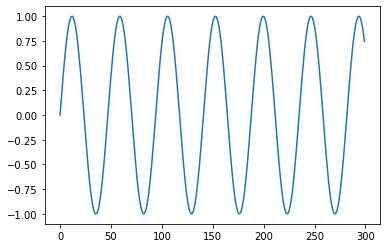

In [206]:
plt.plot(y_observed)

In [0]:
for y in y_observed:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

(-2, 2)

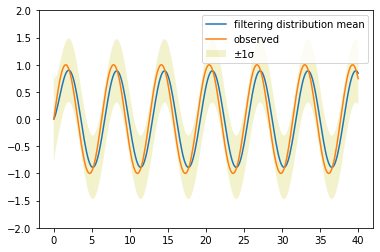

In [208]:
plt.plot(x, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x,
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x, y_observed, label='observed')
plt.legend()
plt.ylim([-2, 2])

### 観測雑音0

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([np.exp(7.29)])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([0])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([1e+7])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

In [0]:
for y in y_observed:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

(-2, 2)

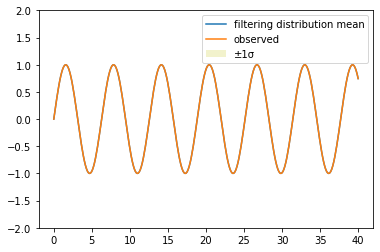

In [212]:
plt.plot(x, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x,
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x, y_observed, label='observed')
plt.legend()
plt.ylim([-2, 2])

## ナイル川流量

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/nile/nile.csv')

In [214]:
df.head()

,year,volume
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160


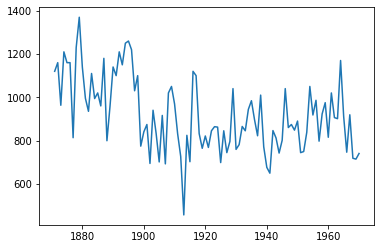

In [215]:
plt.plot(df['year'], df['volume'])

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([10000])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([150000])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([100000])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

In [0]:
for y in df['volume']:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

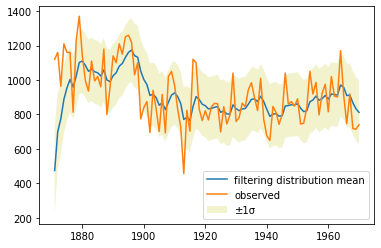

In [227]:
plt.plot(df['year'], [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    df['year'],
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(df['year'], df['volume'], label='observed')
plt.legend()

### 観測雑音小

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([10000])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([10000])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([100000])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

In [0]:
for y in df['volume']:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

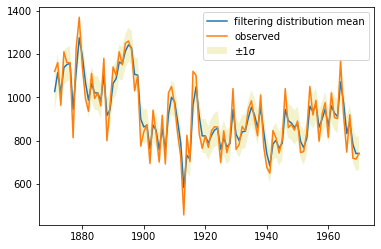

In [239]:
plt.plot(df['year'], [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    df['year'],
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(df['year'], df['volume'], label='observed')
plt.legend()